In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

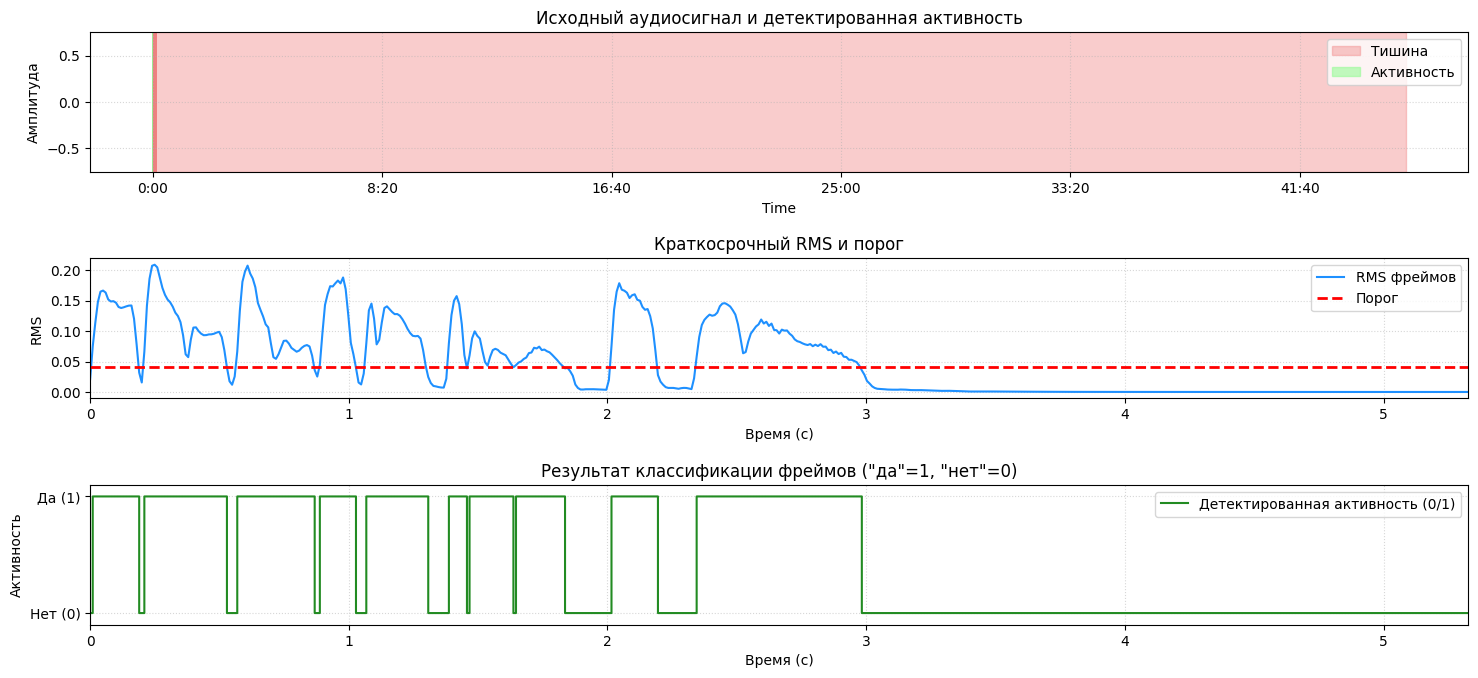

Общее количество фреймов: 535
Количество активных фреймов ('да'): 243
Количество неактивных фреймов ('нет'): 292
Выбранный порог RMS: 0.0418


In [4]:
audio_path = librosa.ex('trumpet')
y, sr = librosa.load(audio_path)

FRAME_LENGTH_SEC = 0.025
HOP_LENGTH_SEC = 0.010

frame_length = int(FRAME_LENGTH_SEC * sr)
hop_length = int(HOP_LENGTH_SEC * sr)

rms_frames = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

threshold = 0.2 * np.max(rms_frames)

activity_frames = (rms_frames >= threshold).astype(int)

times_rms = librosa.frames_to_time(np.arange(len(rms_frames)), sr=sr, hop_length=hop_length)
times_signal = librosa.times_like(y, sr=sr)

plt.figure(figsize=(15, 7)) # Увеличил высоту для лучшего отображения

plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.7)
plt.title('Исходный аудиосигнал и детектированная активность')
plt.ylabel('Амплитуда')

for i in range(len(activity_frames)):
    start_time_frame = times_rms[i]
    end_time_frame = start_time_frame + HOP_LENGTH_SEC 
    if i + 1 < len(times_rms):
        end_time_frame = times_rms[i+1]
    else: # для последнего фрейма
        end_time_frame = times_signal[-1] if len(times_signal) > 0 else start_time_frame + HOP_LENGTH_SEC


    if activity_frames[i] == 1:
        plt.axvspan(start_time_frame, end_time_frame, color='palegreen', alpha=0.6, 
                    label='Активность' if i == (np.where(activity_frames==1)[0][0] if np.any(activity_frames==1) else -1) else "")
    else:
        plt.axvspan(start_time_frame, end_time_frame, color='lightcoral', alpha=0.4,
                    label='Тишина' if i == (np.where(activity_frames==0)[0][0] if np.any(activity_frames==0) else -1) else "")

handles, labels = plt.gca().get_legend_handles_labels()
if handles: # Показываем легенду только если есть метки
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.grid(True, linestyle=':', alpha=0.5)


plt.subplot(3, 1, 2)
plt.plot(times_rms, rms_frames, label='RMS фреймов', color='dodgerblue')
plt.axhline(threshold, color='red', linestyle='--', linewidth=2, label='Порог')
plt.title('Краткосрочный RMS и порог')
plt.xlabel('Время (с)')
plt.ylabel('RMS')
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim([times_rms[0], times_rms[-1]] if len(times_rms)>0 else [0,1])


plt.subplot(3, 1, 3)
plt.plot(times_rms, activity_frames, drawstyle='steps-post', label='Детектированная активность (0/1)', color='forestgreen')
plt.title('Результат классификации фреймов ("да"=1, "нет"=0)')
plt.xlabel('Время (с)')
plt.ylabel('Активность')
plt.yticks([0, 1], ['Нет (0)', 'Да (1)'])
plt.ylim([-0.1, 1.1])
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim([times_rms[0], times_rms[-1]] if len(times_rms)>0 else [0,1])


plt.tight_layout(pad=1.5)
plt.show()

num_active_frames = np.sum(activity_frames)
num_inactive_frames = len(activity_frames) - num_active_frames
print(f"Общее количество фреймов: {len(activity_frames)}")
print(f"Количество активных фреймов ('да'): {num_active_frames}")
print(f"Количество неактивных фреймов ('нет'): {num_inactive_frames}")
print(f"Выбранный порог RMS: {threshold:.4f}")